In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
 import pandas as pd
 import re
 import matplotlib.pyplot as plt
 import numpy as np
 import seaborn as sns


In [114]:
path = "/content/drive/MyDrive/projectFOC/Motor_Vehicle_Collisions_-_Vehicles.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [115]:
#converting CRASH_DATE  to datetime type reason: we have to use datetime operations 
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
#extracting only given paramter data from whole df
start_date = '2018-05-01'
end_date   = '2020-04-30'
mvc_data = df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date') 
print(mvc_data)



         UNIQUE_ID  COLLISION_ID CRASH_DATE CRASH_TIME  \
1         19140702       4213082 2019-09-23       8:15   
6         19138701       4229067 2019-10-24      13:15   
13        19140791       4229563 2019-10-21      17:55   
19        19140656       4229538 2019-10-24      17:30   
20        19139721       4228839 2019-10-24      16:00   
...            ...           ...        ...        ...   
3698432   20117301       4294518 2020-02-28       0:21   
3698894   20099855       4063673 2019-01-07      12:45   
3702546   20101746       4295822 2020-02-27      10:00   
3702738   20113436       4060927 2019-01-01      17:00   
3703780   20112133       4479833 2019-11-19       1:50   

                                   VEHICLE_ID STATE_REGISTRATION  \
1        0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
6        c53b43d9-419a-4ab1-9361-3f2979078d89                 NY   
13       86a294b4-6672-4a7e-8357-39d6d2eff9f7                 PA   
19       70e5262a-bd27-48a6-99a

In [116]:
#creating new csv file with selected paramter data
mvc_data.to_csv("/content/drive/MyDrive/projectFOC/Mvcdata.csv")

In [117]:
#giving path and then reading csv 
path = "/content/drive/MyDrive/projectFOC/Mvcdata.csv"
df = pd.read_csv(path) 


In [118]:
#query for wxtracting month and year seperatly
df['CRASH_DATE'] = pd.to_datetime(df["CRASH_DATE"])
df['YEAR'], df['MONTH'] = df['CRASH_DATE'].dt.year, df['CRASH_DATE'].dt.month


In [119]:
df

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,...,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
3,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,...,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
4,20,19139721,4228839,2019-10-24,16:00,5bb0b59a-ce74-4a04-9f92-1446ebfe4f46,NC,Sedan,TOYT -CAR/SUV,NaN,...,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836673,3698432,20117301,4294518,2020-02-28,0:21,39f288b8-1785-4eeb-9e77-2b3e033cb3c1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unspecified,NYC DOT SIGNS AND GUARDRAIL,NaN,NaN,2020,2
836674,3698894,20099855,4063673,2019-01-07,12:45,ae6c19f2-30a0-4892-8f08-d80fcbb057c6,NJ,Sedan,HYUN -CAR/SUV,NaN,...,Right Front Quarter Panel,Right Front Bumper,Center Front End,Left Front Bumper,N,NaN,Unspecified,Unspecified,2019,1
836675,3702546,20101746,4295822,2020-02-27,10:00,5ec4913a-a77d-439a-81b9-0ce8a2d27c2d,NY,Dump,MACK-TRUCK/BUS,NaN,...,No Damage,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2020,2
836676,3702738,20113436,4060927,2019-01-01,17:00,154f05e4-c36a-4461-bcec-c08f98e9cc2b,IN,Sedan,HYUN -CAR/SUV,NaN,...,Right Front Bumper,Right Front Quarter Panel,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,1


In [120]:
df.columns


Index(['Unnamed: 0', 'UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME',
       'VEHICLE_ID', 'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE',
       'VEHICLE_MODEL', 'VEHICLE_YEAR', 'TRAVEL_DIRECTION',
       'VEHICLE_OCCUPANTS', 'DRIVER_SEX', 'DRIVER_LICENSE_STATUS',
       'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH', 'POINT_OF_IMPACT',
       'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1', 'VEHICLE_DAMAGE_2',
       'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2', 'YEAR', 'MONTH'],
      dtype='object')

In [121]:
df1=df[['CRASH_DATE','VEHICLE_MAKE','YEAR','MONTH']]

In [122]:
df1


,CRASH_DATE,VEHICLE_MAKE,YEAR,MONTH
0,2019-09-23,TOYT -CAR/SUV,2019,9
1,2019-10-24,FRHT-TRUCK/BUS,2019,10
2,2019-10-21,BMW -CAR/SUV,2019,10
3,2019-10-24,JEEP -CAR/SUV,2019,10
4,2019-10-24,TOYT -CAR/SUV,2019,10
...,...,...,...,...
836673,2020-02-28,NaN,2020,2
836674,2019-01-07,HYUN -CAR/SUV,2019,1
836675,2020-02-27,MACK-TRUCK/BUS,2020,2
836676,2019-01-01,HYUN -CAR/SUV,2019,1


In [123]:
#droping extra values
df2=df1.dropna(subset=["VEHICLE_MAKE"])
df2

,CRASH_DATE,VEHICLE_MAKE,YEAR,MONTH
0,2019-09-23,TOYT -CAR/SUV,2019,9
1,2019-10-24,FRHT-TRUCK/BUS,2019,10
2,2019-10-21,BMW -CAR/SUV,2019,10
3,2019-10-24,JEEP -CAR/SUV,2019,10
4,2019-10-24,TOYT -CAR/SUV,2019,10
...,...,...,...,...
836671,2019-01-01,ACUR -CAR/SUV,2019,1
836672,2018-07-12,CHRY -CAR/SUV,2018,7
836674,2019-01-07,HYUN -CAR/SUV,2019,1
836675,2020-02-27,MACK-TRUCK/BUS,2020,2


In [124]:
#
def Clean_names(VEHICLE_MAKE):
#using Regex for  searching   hyphen(-) in the name followed by any
#characters repeated any number of times
    if re.search('\ .*', VEHICLE_MAKE):
        # Extract the position of beginning of pattern
        pos = re.search('\ .*', VEHICLE_MAKE).start()
        # return the cleaned name
        return VEHICLE_MAKE[:pos]
    else:
        # if clean up needed return the same name
        return VEHICLE_MAKE
# Updating  the vehicle_make columns after RE
df2['VEHICLE_MAKE'] = df2['VEHICLE_MAKE'].apply(Clean_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
df2

,CRASH_DATE,VEHICLE_MAKE,YEAR,MONTH
0,2019-09-23,TOYT,2019,9
1,2019-10-24,FRHT-TRUCK/BUS,2019,10
2,2019-10-21,BMW,2019,10
3,2019-10-24,JEEP,2019,10
4,2019-10-24,TOYT,2019,10
...,...,...,...,...
836671,2019-01-01,ACUR,2019,1
836672,2018-07-12,CHRY,2018,7
836674,2019-01-07,HYUN,2019,1
836675,2020-02-27,MACK-TRUCK/BUS,2020,2


In [126]:
#definding function and appling condition
def Clean_extra(VEHICLE_MAKE):
#Regex to search for hyphen(-) in the name followed by any
#characters repeated any number of times
    if VEHICLE_MAKE in ['JEEP','CADI','NISS','VOLK']:
        # Extract the position of beginning of pattern
        
        # return the cleaned name
        return VEHICLE_MAKE
    else:
        # if clean up needed return the same name
        return np.NaN
# Update the vehicle_make columns
df2['VEHICLE_MAKE'] = df2['VEHICLE_MAKE'].apply(Clean_extra)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
#cleaning with dropna
df2=df2.dropna(subset=["VEHICLE_MAKE"])

In [128]:
df2

,CRASH_DATE,VEHICLE_MAKE,YEAR,MONTH
3,2019-10-24,JEEP,2019,10
5,2019-10-24,NISS,2019,10
16,2019-10-24,NISS,2019,10
18,2019-10-24,NISS,2019,10
32,2019-10-24,NISS,2019,10
...,...,...,...,...
836642,2019-11-29,NISS,2019,11
836647,2020-01-16,NISS,2020,1
836660,2018-12-26,NISS,2018,12
836662,2019-11-19,NISS,2019,11


In [129]:
#applying groupby and count  for query proccesing
df3=df2.groupby(['VEHICLE_MAKE','YEAR']).count()


In [130]:
df3

CRASH_DATE  MONTH
VEHICLE_MAKE YEAR                   
CADI         2018        2377   2377
             2019        3089   3089
             2020         613    613
JEEP         2018        8940   8940
             2019       12559  12559
             2020        2552   2552
NISS         2018       30323  30323
             2019       39716  39716
             2020        8051   8051
VOLK         2018        4087   4087
             2019        5204   5204
             2020        1075   1075

In [131]:
df3.rename(columns = {'CRASH_DATE':'COUNT_NO'}, inplace = True)
df3

COUNT_NO  MONTH
VEHICLE_MAKE YEAR                 
CADI         2018      2377   2377
             2019      3089   3089
             2020       613    613
JEEP         2018      8940   8940
             2019     12559  12559
             2020      2552   2552
NISS         2018     30323  30323
             2019     39716  39716
             2020      8051   8051
VOLK         2018      4087   4087
             2019      5204   5204
             2020      1075   1075

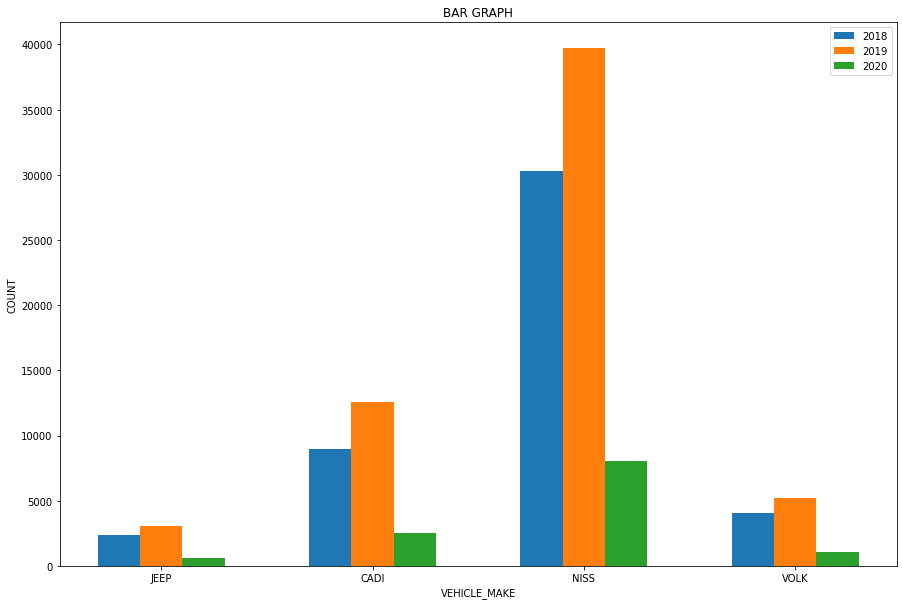

In [132]:
#ploting bar graph using matplotlib library
import numpy as np
import matplotlib.pyplot as plt
# list making
X = ['JEEP','CADI','NISS','VOLK']
year_2018 = [2377,8940,30323,4087]
year_2019 = [3089,12559,39716,5204]
year_2020 = [613,2552,8051,1075]
#apply sizing of bar
plt.figure(figsize=(15,10))

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2 , year_2018, width=0.2, label = '2018')
plt.bar(X_axis +0.0 , year_2019, width=0.2, label = '2019')
plt.bar(X_axis +0.2, year_2020, width=0.2, label = '2020')

#assign name for x and y axis
plt.xticks(X_axis,X)
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("COUNT")
plt.title("BAR GRAPH" ) 
plt.legend()

plt.show()
 


# Q2

In [133]:
df2

,CRASH_DATE,VEHICLE_MAKE,YEAR,MONTH
3,2019-10-24,JEEP,2019,10
5,2019-10-24,NISS,2019,10
16,2019-10-24,NISS,2019,10
18,2019-10-24,NISS,2019,10
32,2019-10-24,NISS,2019,10
...,...,...,...,...
836642,2019-11-29,NISS,2019,11
836647,2020-01-16,NISS,2020,1
836660,2018-12-26,NISS,2018,12
836662,2019-11-19,NISS,2019,11


In [134]:
df2.columns

Index(['CRASH_DATE', 'VEHICLE_MAKE', 'YEAR', 'MONTH'], dtype='object')

In [135]:
df3=df2.groupby(['VEHICLE_MAKE','YEAR','MONTH'])


In [136]:
df3=df2.groupby(['VEHICLE_MAKE','YEAR','MONTH']).count()

df3.rename(columns = {'CRASH_DATE':'COUNT_NO'}, inplace = True)
df3



COUNT_NO
VEHICLE_MAKE YEAR MONTH          
CADI         2018 5           343
                  6           313
                  7           281
                  8           303
                  9           280
...                           ...
VOLK         2019 12          438
             2020 1           333
                  2           351
                  3           268
                  4           123

[96 rows x 1 columns]

In [137]:
#reset using beacuse groupby bydefault convert column name into index 
reset_df = df3.reset_index()
reset_df


,VEHICLE_MAKE,YEAR,MONTH,COUNT_NO
0,CADI,2018,5,343
1,CADI,2018,6,313
2,CADI,2018,7,281
3,CADI,2018,8,303
4,CADI,2018,9,280
...,...,...,...,...
91,VOLK,2019,12,438
92,VOLK,2020,1,333
93,VOLK,2020,2,351
94,VOLK,2020,3,268


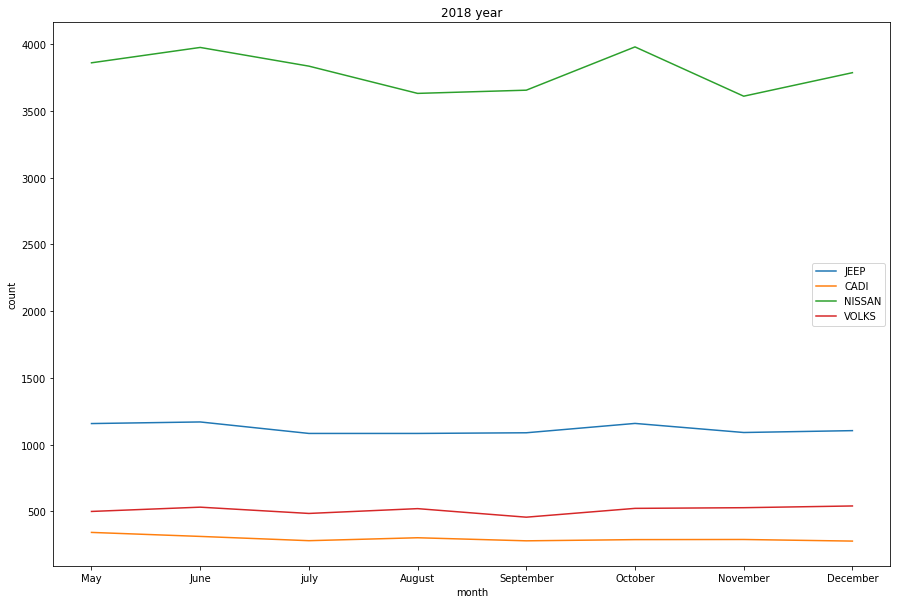

In [138]:
plt.figure(figsize=(15,10))
x=['May', 'June', 'july', 'August', 'September', 'October', 'November', 'December']
count_CADI_2018 = df3[0:8:1]
count_JEEP_2018 = df3[24:32:1]
count_NISS_2018= df3[48:56:1]
count_VOLKS_2018 = df3[72:80:1]

plt.plot (x, count_JEEP_2018, label = 'JEEP')
plt.plot (x, count_CADI_2018, label = 'CADI')
plt.plot (x, count_NISS_2018, label = 'NISSAN')
plt.plot (x, count_VOLKS_2018, label = 'VOLKS')


plt.title("2018 year")
plt.xlabel("month")
plt.ylabel("count")
plt.legend()
plt.show()


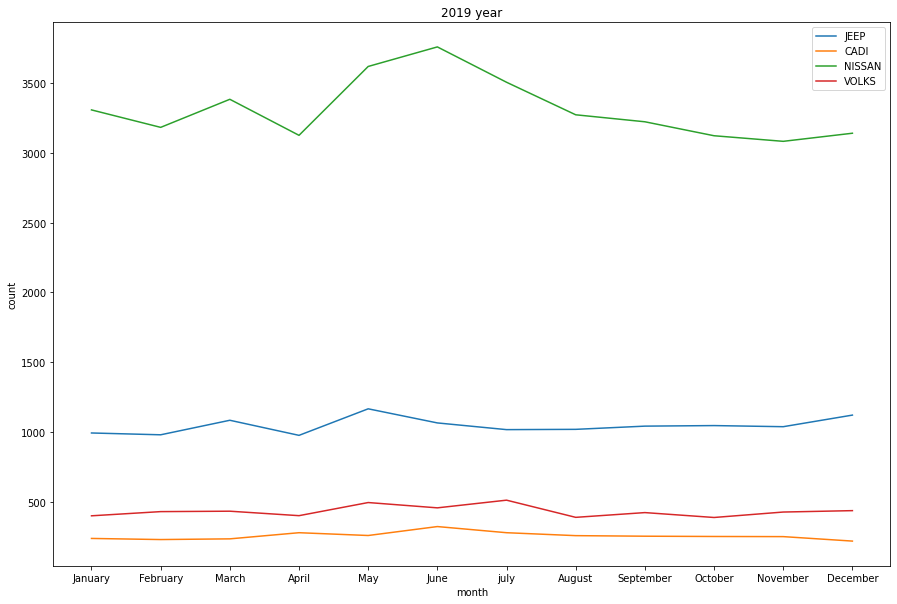

In [139]:
plt.figure(figsize=(15,10))
x1=['January','February', 'March', 'April', 'May', 'June', 'july', 'August', 'September', 'October', 'November', 'December']

count_CADI_2019 = df3[8:20:1]
count_JEEP_2019 = df3[32:44:1]
count_NISS_2019= df3[56:68:1]
count_VOLKS_2019 = df3[80:92:1]


plt.plot (x1, count_JEEP_2019, label = 'JEEP')
plt.plot (x1, count_CADI_2019, label = 'CADI')
plt.plot (x1, count_NISS_2019, label = 'NISSAN')
plt.plot (x1, count_VOLKS_2019, label = 'VOLKS')


plt.title("2019 year")
plt.xlabel("month")
plt.ylabel("count")
plt.legend()
plt.show()


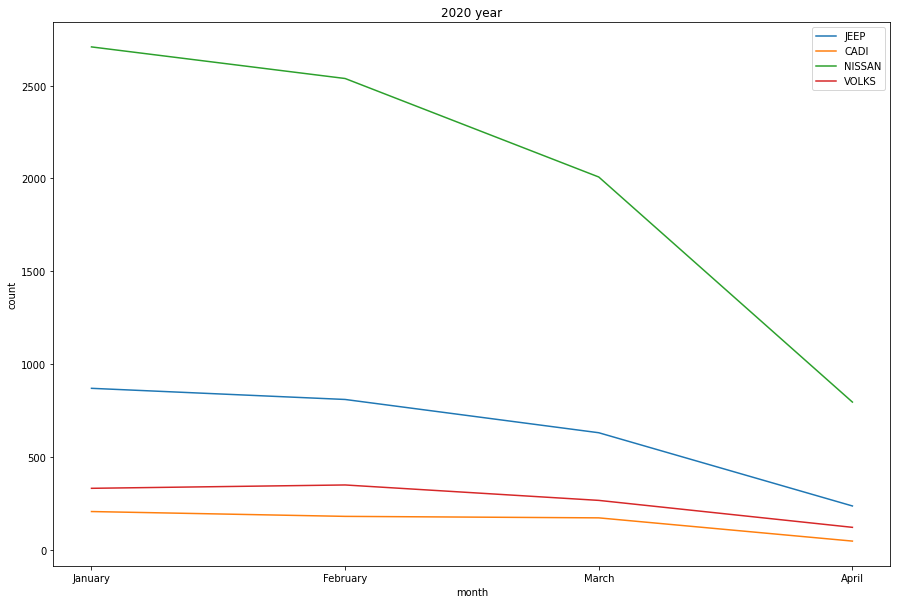

In [140]:
plt.figure(figsize=(15,10))
x2=['January','February', 'March', 'April']

count_CADI_2020 = df3[20:24:1]
count_JEEP_2020 = df3[44:48:1]
count_NISS_2020= df3[68:72:1]
count_VOLKS_2020 = df3[92:96:1]


plt.plot (x2, count_JEEP_2020, label = 'JEEP')
plt.plot (x2, count_CADI_2020, label = 'CADI')
plt.plot (x2, count_NISS_2020, label = 'NISSAN')
plt.plot (x2, count_VOLKS_2020, label = 'VOLKS')

plt.legend()
plt.title("2020 year")
plt.xlabel("month")
plt.ylabel("count")

plt.show()

Q3

In [141]:
#creating new csv and storing cleaned data only
df10 = pd.read_csv("/content/drive/MyDrive/projectFOC/Mvcdata.csv")
df10 = df10.replace(to_replace=["Sedan","4 dr sedan","2 dr sedan"],value="Sedans")
df10 = df10.replace(to_replace=["SPORT UTILITY / STATION WAGON", "Station Wagon/Sport Utility Vehicle","Station Wagon/Sport Utility Vehicle"],value="Sport Utility Vehicle")
df10 = df10.replace(to_replace=["TAXI","Taxi"],value="Taxi")
df10 = df10.replace(to_replace=["Pick-up Truck", "Box Truck"],value="Trucks")
df10.to_csv("/content/drive/MyDrive/projectFOC/Query3.csv" )

In [142]:
def Clean(VEHICLE_TYPE):
#Regex to search for hyphen(-) in the name followed by any
#characters repeated any number of times
    if VEHICLE_TYPE in ['Bicycle','Motorcycle','Taxi','Sedans','Sport Utility Vehicle','Trucks','Bus','Van','Bike','PASSENGER VEHICLE']:
        # Extract the position of beginning of pattern
        
        # return the cleaned name
        return VEHICLE_TYPE
    else:
        # if clean up needed return the same name
        return np.NaN
# Update the vehicle_make columns
df10['VEHICLE_TYPE'] = df10['VEHICLE_TYPE'].apply(Clean)
df10 = df10.dropna(subset=["VEHICLE_TYPE"])
df10.to_csv("/content/drive/MyDrive/projectFOC/Query4.csv" )
df10 = pd.read_csv("/content/drive/MyDrive/projectFOC/Query4.csv")
df10 = df10.groupby(["VEHICLE_TYPE"]).count()
df10

,Unnamed: 0,Unnamed: 0.1,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_MAKE,VEHICLE_MODEL,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
VEHICLE_TYPE,,,,,,,,,,,,,,,,,,,,,
Bike,11942,11942,11942,11942,11942,11942,11942,658,34,0,...,11782,11858,11811,5507,5124,4841,11942,0,11918,11885
Bus,12840,12840,12840,12840,12840,12840,12840,12618,11384,0,...,12713,12672,12606,6503,5265,4759,12840,0,12761,12699
Motorcycle,4016,4016,4016,4016,4016,4016,4016,3757,3634,0,...,3976,3986,3964,2472,1948,1575,4016,0,4000,3981
Sedans,344991,344991,344991,344991,344991,344991,344991,341335,340057,0,...,342221,342398,341162,234135,173452,128905,344991,0,343710,342898
Sport Utility Vehicle,286334,286334,286334,286334,286334,286334,286334,284275,282203,0,...,284608,284485,283506,183345,134276,100633,286334,0,285518,284891
Taxi,35557,35557,35557,35557,35557,35557,35557,35399,35152,0,...,35354,35385,35291,24389,19117,15922,35557,0,35486,35430
Trucks,43376,43376,43376,43376,43376,43376,43376,42597,40149,0,...,42899,42912,42664,23201,18776,16114,43376,0,43135,42954
Van,5208,5208,5208,5208,5208,5208,5208,5141,4543,0,...,5141,5146,5120,2707,2099,1792,5208,0,5175,5151


analysis.shape
average

In [143]:
df10 = df10.reset_index()
df10 = df10[['VEHICLE_TYPE','CRASH_TIME']]
df10

,VEHICLE_TYPE,CRASH_TIME
0,Bike,11942
1,Bus,12840
2,Motorcycle,4016
3,Sedans,344991
4,Sport Utility Vehicle,286334
5,Taxi,35557
6,Trucks,43376
7,Van,5208


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

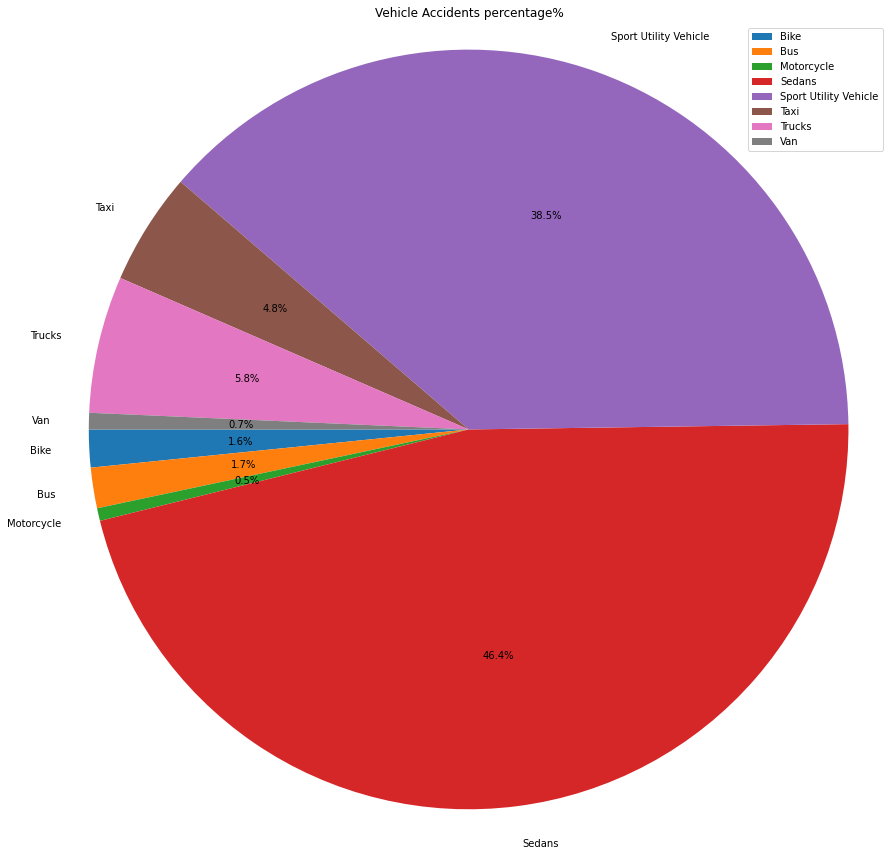

In [144]:

Count = df10.iloc[:,1]
Type = ['Bike','Bus','Motorcycle','Sedans','Sport Utility Vehicle','Taxi','Trucks','Van']

plt.figure(figsize=(15,15))

plt.pie(Count, labels = Type, autopct = '%1.1f%%', explode = None,shadow = None, startangle = 180)
plt.title("Vehicle Accidents percentage%")
plt.axis('equal')
plt.legend()
plt.plot